<a href="https://colab.research.google.com/github/YangchenHuang/COMS-W4995-012/blob/master/Notebooks/pytorch_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST w/ PyTorch on GPU

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
print(torch.__version__)

1.4.0


In [0]:
transform = transforms.Compose([transforms.ToTensor()])

In [4]:
trainset = torchvision.datasets.MNIST(root='../data', 
                                      train=True,
                                      download=True, 
                                      transform=transform)


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


In [0]:
testset = torchvision.datasets.MNIST(root='../data',
                                     train=False,
                                     transform=transform)

In [0]:
batch_size = 32

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=4)

In [0]:
testloader = torch.utils.data.DataLoader(testset, 
                                          batch_size=batch_size, 
                                          num_workers=4)

In [0]:
classes = list(range(10))

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    npimg = img.numpy()
    npimg = np.squeeze(npimg, 0)
    plt.imshow(npimg, cmap=plt.cm.binary)
    plt.show()

# function to show a grid of 5x5 images
def imgrid(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      npimg = images[i].numpy()
      npimg = np.squeeze(npimg, 0)
      plt.imshow(npimg, cmap=plt.cm.binary)
      plt.xlabel(str(labels[i].numpy()))
  plt.show()

In [0]:
# get some random training images
dataiter = iter(trainloader)

In [12]:
print(dataiter)

In [0]:
images, labels = dataiter.next()

In [14]:
print(type(images))
print(type(images[0]))
print(images.shape)
#print(images[0].numpy())

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])


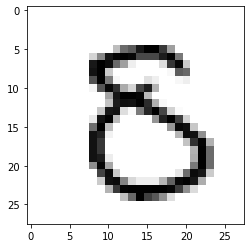

8


In [15]:
imshow(images[0])
print(classes[labels[0]])

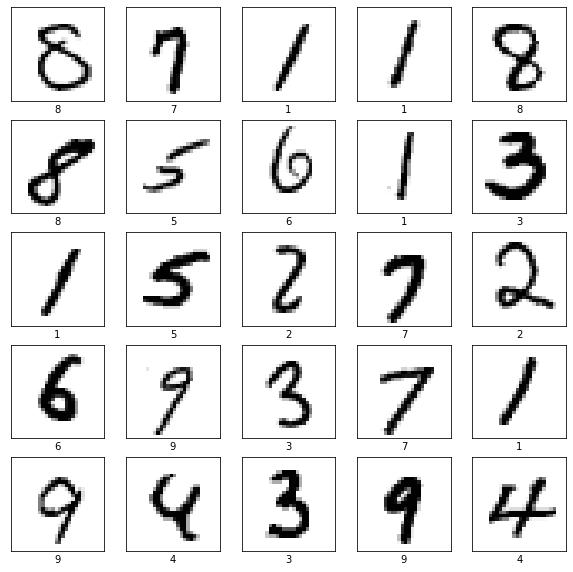

In [16]:
imgrid(images[0:25], labels[0:25])

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
net = Net().to(device)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [21]:
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        #print(net.fc1.weight.grad.sum())
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        #print(net.fc1.weight.grad.shape)
        #sdf

        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.002
[1,  1001] loss: 0.379
[2,     1] loss: 0.000
[2,  1001] loss: 0.138
[3,     1] loss: 0.000
[3,  1001] loss: 0.089
[4,     1] loss: 0.000
[4,  1001] loss: 0.063
[5,     1] loss: 0.000
[5,  1001] loss: 0.047
Finished Training


In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 97 %
Accuracy of     1 : 98 %
Accuracy of     2 : 96 %
Accuracy of     3 : 96 %
Accuracy of     4 : 97 %
Accuracy of     5 : 95 %
Accuracy of     6 : 98 %
Accuracy of     7 : 97 %
Accuracy of     8 : 97 %
Accuracy of     9 : 97 %
